In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

In [4]:
# Current Directory

df = pd.read_excel(r'C:\Users\jason\Downloads\movies.xlsx')

In [5]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22 00:00:00,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11 00:00:00,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16 00:00:00,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18 00:00:00,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01 00:00:00,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [6]:
# Let's see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [7]:
# Data types for our columns

df.dtypes

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [8]:
# Create correct Year column

df['yearcorrect'] = df['released'].astype('str').str[:4]
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22 00:00:00,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11 00:00:00,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16 00:00:00,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18 00:00:00,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01 00:00:00,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


In [9]:
df.sort_values(by=['gross'], inplace=False, ascending=False).head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18 00:00:00,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18 00:00:00,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19 00:00:00,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12 00:00:00,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04 00:00:00,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


In [10]:
pd.set_option('display.max_rows', None)

In [11]:
# Drop any duplicates

df.drop_duplicates().head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22 00:00:00,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11 00:00:00,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16 00:00:00,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18 00:00:00,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01 00:00:00,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


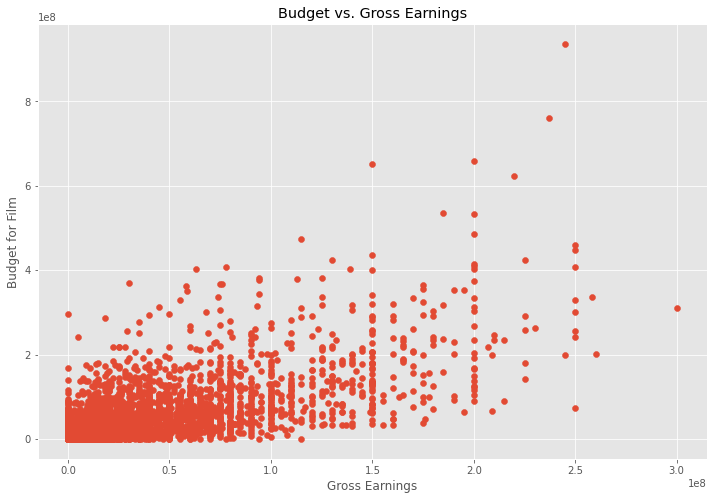

In [12]:
# Scatter plot with budget vs. gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs. Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

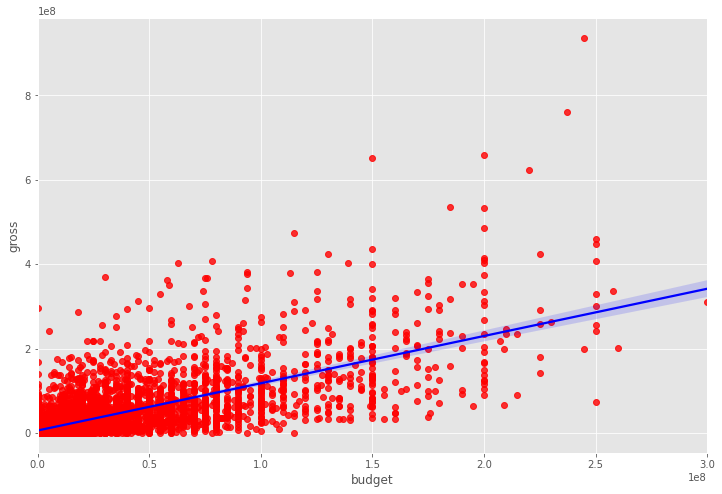

In [13]:
# Plot budget vs. gross using seaborn

sns.regplot(x='budget', y='gross',data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [31]:
# Start looking at correlation.
# Higher correlation is good
# Only numeric columns are allowed

df.corr()  # pearson, kendall, spearman

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
budget,1.000000,0.187207,0.137635,0.011602,-0.346794,0.712196,0.028703,-0.119660,0.278188,0.268226,0.042145,-0.015061,0.503924,-0.015611,0.291009,0.274820
company,0.187207,1.000000,0.107943,0.004326,-0.068332,0.187224,0.018117,-0.062254,0.030472,0.033068,-0.010417,-0.003173,0.138664,-0.004026,0.036252,0.027991
country,0.137635,0.107943,1.000000,0.003698,-0.042793,0.149988,0.025008,0.057979,-0.054399,-0.081796,-0.174414,-0.014566,0.078657,0.024981,-0.045204,-0.062707
director,0.011602,0.004326,0.003698,1.000000,-0.027668,-0.011429,0.001892,0.021926,-0.000310,0.026779,0.017130,0.039813,0.000639,0.298997,-0.000088,0.001822
genre,-0.346794,-0.068332,-0.042793,-0.027668,1.000000,-0.242676,0.018045,0.100960,-0.039654,-0.041357,0.056234,0.008140,-0.150519,-0.000608,-0.046259,-0.039014
gross,0.712196,0.187224,0.149988,-0.011429,-0.242676,1.000000,0.022754,-0.135538,0.181111,0.224579,0.165693,0.008382,0.662457,-0.009455,0.191548,0.176879
name,0.028703,0.018117,0.025008,0.001892,0.018045,0.022754,1.000000,0.001275,0.021506,0.013943,0.023339,-0.001915,0.023653,0.009798,0.024606,0.023393
rating,-0.119660,-0.062254,0.057979,0.021926,0.100960,-0.135538,0.001275,1.000000,0.013641,0.079542,0.019271,0.007893,0.011678,0.010740,0.016221,0.017438
released,0.278188,0.030472,-0.054399,-0.000310,-0.039654,0.181111,0.021506,0.013641,1.000000,0.086955,0.110072,-0.025505,0.219245,-0.005377,0.990326,0.988111
runtime,0.268226,0.033068,-0.081796,0.026779,-0.041357,0.224579,0.013943,0.079542,0.086955,1.000000,0.395343,0.016019,0.317399,0.000759,0.087639,0.088342


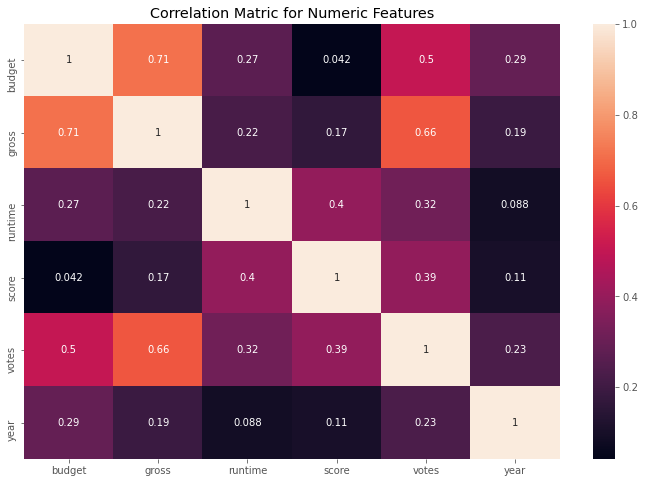

In [14]:
# High correlation between budget and gross
# Dark color == Low correlation & Light color == High correlation

correlation_matrix = df.corr(method='pearson')

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie features')
plt.ylabel('Movie features')


sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [15]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')  # change object types to category types
        df_numerized[col_name] = df_numerized[col_name].cat.codes  # gives randomw ID number for category types
df_numerized.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000,665,54,2192,1,52287414,4661,8,0,89,8.1,2454,299174,3716,1986,0
1,6000000,1680,54,1296,4,70136369,1821,7,1,103,7.8,1605,264740,1970,1986,0
2,15000000,1680,54,2645,0,179800601,6203,6,2,110,6.9,2345,236909,1852,1986,0
3,18500000,2062,54,1066,0,85160248,295,8,3,137,8.4,2192,540152,1629,1986,0
4,9000000,2122,54,2123,1,18564613,1872,6,4,90,6.9,1139,36636,2549,1986,0


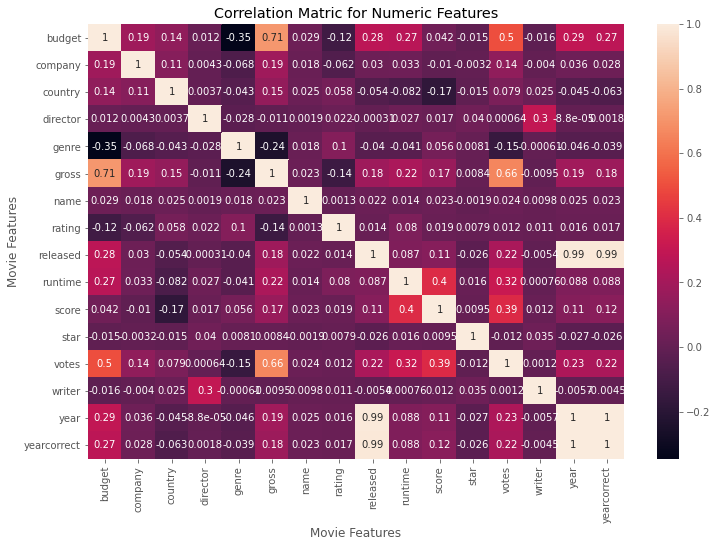

In [16]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [17]:
# Unstacking correlations

correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()

In [18]:
# Sort correlations

sorted_pairs = corr_pairs.sort_values()

In [19]:
high_corr = sorted_pairs[((sorted_pairs) > 0.5) & ((sorted_pairs) != 1)]
high_corr

# Votes and budget have the highest correlation to gross earning

votes        budget         0.503924
budget       votes          0.503924
votes        gross          0.662457
gross        votes          0.662457
             budget         0.712196
budget       gross          0.712196
yearcorrect  released       0.988111
released     yearcorrect    0.988111
             year           0.990326
year         released       0.990326
yearcorrect  year           0.996229
year         yearcorrect    0.996229
dtype: float64